# -----------------------------librerías extra

In [62]:
using ProgressMeter
using Cubature
using PyPlot

In [63]:
using Graf
using nintegrate

### ----------------------------constantes

### ----------------------------

In [64]:
const hbarr=6.62606957e-34;
const Kb=1.3806488e-23
m=144.42e-27/2;

lambda=1

omegaz =150.0
omegar =lambda*omegaz;

Npart=10.0^7.0;
n=10.0^20.0;
alfa=5.8e-9;
g_alfa=4.0*π*hbarr^2*alfa/m;
omegam=(omegar^2*omegaz)^(1/3);
mu=(hbarr/2) *(2*sqrt(omegar)+omegaz)#0.5*hbarr*omegam*(15*Npart*alfa*sqrt(m*omegam/hbarr))^(2.0/5.0);
c = sqrt(n*g_alfa/m);


#------------Parámetros característicos del solitón bosónico
ksi=1/sqrt(4*pi*n*alfa);
beta=0.0;
algo=11.0

z0=algo*ksi;
gama=1/(sqrt(1-beta^2));

const m = 1.0;
const hbarr = 1.0;
omegaz = 0.05;
omegar = 7.0*omegaz;
n=1.;
alfa=10.0;
g_alfa=4.0*π*alfa;
omegam=(omegar*omegaz)^(1/3);
mu=0.5*omegam*(15*alfa*sqrt(m*omegam))^(2.0/5.0);

c = sqrt(n*g_alfa/m);


# -------------parámetros característicos del solitón bosónico
ksi=0.1;
beta=0.0;
algo=5.0;
z0=algo*ksi;
gama=1/(sqrt(1-beta^2));

### ----Función de onda

In [65]:

function sol(z::Float64)
(tanh((z-z0)/(ksi*gama)))/gama
end

function U(r::Float64,z::Float64)
    (1/2)*m*((omegar*r)^2 + (omegaz*z)^2)
end

function n_tf(r::Float64,z::Float64)            
    if  mu-U(r,z)>0 0
        return (mu-U(r,z))/(n*g_alfa)              
    end
    return 0       
end


function FUNCIONTF0(r::Float64,z::Float64)
    sqrt(n_tf(r,z))*(sol(z)+im*beta)
end

function FUNCIONTF0(v::Vector{Float64})
    FUNCIONTF0(v[1],v[2])
end

FUNCIONTF0 (generic function with 2 methods)

In [66]:
rmax_estatico=sqrt(2*mu/(m*omegar^2))
zmax_estatico=sqrt(2*mu/(m*omegaz^2))


function rmaxintegrar(t::Float64)
    rmax_estatico/sqrt(abs(sin(omegar*t)))
end

function zmaxintegrar(t::Float64)
    zmax_estatico/sqrt(abs(sin(omegaz*t)))
end



rmaxevaluar=5*rmax_estatico;
zmaxevaluar=5*zmax_estatico;


In [73]:
N_est=(m/hbarr)^(3/2)*omegar*sqrt(omegaz)/sqrt(2*π);

In [74]:
N_est^2

6.952131360975729e29

In [67]:
#unidades 0A
EOA=hbarr*omegam;
tOA=1/omegam;
lOA=sqrt(hbarr/(m*omegam));


g_alfa_OA=4*π*Npart*alfa*sqrt(m*omegam/hbarr);
nOA=n*(m*omegam/hbarr)^(3/2);
cOA=c*sqrt(m/(hbarr*omegam))
muOA=mu/(hbarr*omegam);



algo=0.5
z0=algo*lOA;


In [68]:
rmaxevaluar/lOA

5.392817714760867

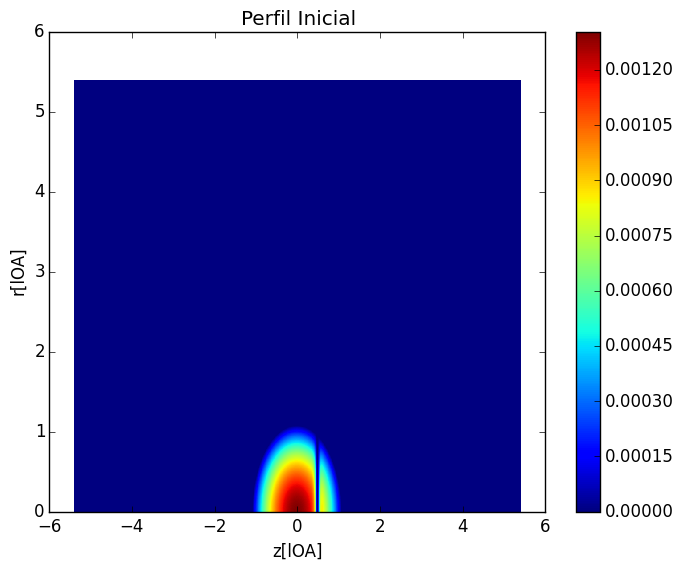

In [69]:
resolucion=1000;

perfilinicial=zeros(resolucion+1,resolucion+1)



function ρ0(r::Float64,z::Float64)
    FUNCIONTF0(r,z) *conj(FUNCIONTF0(r,z))
end

perfilinicial=gencodominio2D([-zmaxevaluar,zmaxevaluar],[0.0,rmaxevaluar],resolucion,ρ0);
grafdensidad([-zmaxevaluar/lOA,zmaxevaluar/lOA],[0.0,rmaxevaluar/lOA],resolucion+1, perfilinicial,"Perfil Inicial","z[lOA]","r[lOA]","barra")
savefig("perfilinicial con lOA=$lOA,z0=$algo*ksi.png")

# ----------------------------------------------------------------------------------------------

In [70]:
rmax_estatico/lOA

1.0785635429521734

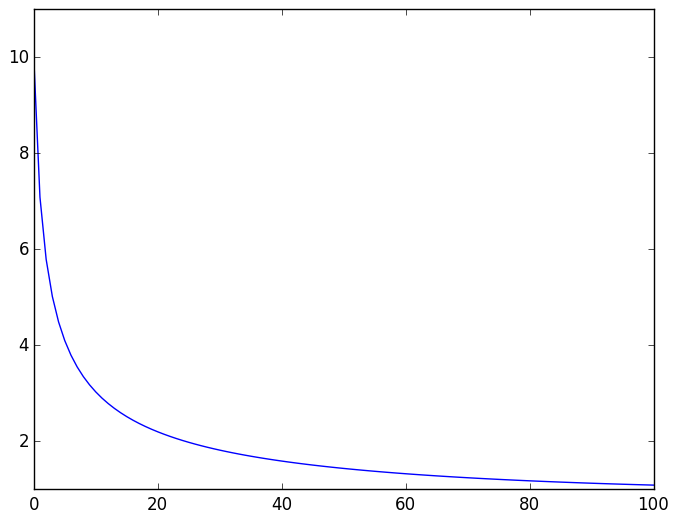

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fde0699d6d0>

In [71]:
tiempos=linspace(tOA/100,tOA,101);
rmax=zeros(101);
zmax=zeros(101);

[rmax[i]=1/sqrt(abs(sin(omegar*tiempos[i]))) for i in 1:101]; 
[zmax[i]=1/sqrt(abs(sin(omegaz*tiempos[i]))) for i in 1:101]; 

PyPlot.plot(rmax)

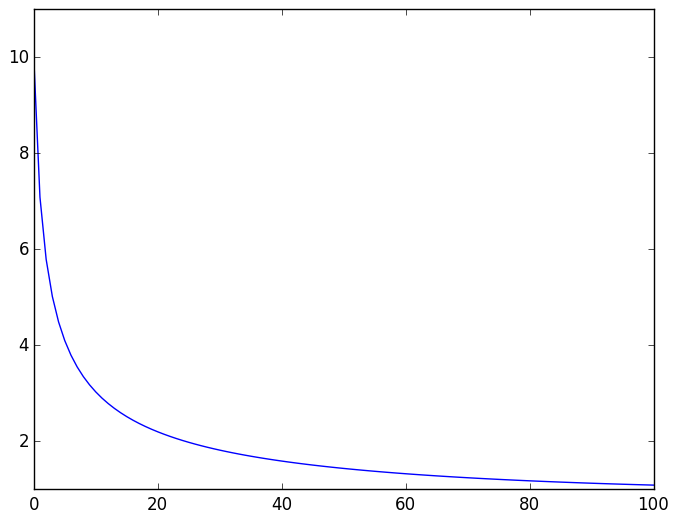

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fde06901550>

In [72]:
PyPlot.plot(zmax)